# Logistic Regression - Telecom Churn Case Study:

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing all the required libraries and dependencies:

In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Step 2: Importing the data:

In [408]:
churn = pd.read_csv('churn_data.csv')
customer = pd.read_csv('customer_data.csv')
internet = pd.read_csv('internet_data.csv')

In [410]:
churn.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [411]:
customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [414]:
internet.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


#### Combining all these 3 diffnt. datasets into one single dataframe:

The common feature we have in all these dfs is the __'customerID'__.

In [417]:
df1 = pd.merge(left=churn, right=customer,on='customerID', how='inner')
df1.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No


In [418]:
df = pd.merge(left=df1, right=internet, on='customerID', how='inner')
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No


In [420]:
df.shape

(7043, 21)

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [424]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [425]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

### Step 3: Data Preparation:

#### Converting Binary variables (Yes/No) to 0/1:

In [430]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [431]:
for i in ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']:
    print(df[i].unique())
    print('-'*20)

['No' 'Yes']
--------------------
['Yes' 'No']
--------------------
['No' 'Yes']
--------------------
['Yes' 'No']
--------------------
['No' 'Yes']
--------------------


In [433]:
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def binary_mapping(x):
    return x.map({'Yes':1, 'No':0})

df[varlist] = df[varlist].apply(binary_mapping)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For Categorical variables with multiple levels, creating dummy features (one-hot-encoding):

In [437]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [439]:
for i in ['Contract', 'PaymentMethod', 'gender', 'InternetService']:
    print(i,':',df[i].unique())
    print('-'*20)

Contract : ['Month-to-month' 'One year' 'Two year']
--------------------
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------
gender : ['Female' 'Male']
--------------------
InternetService : ['DSL' 'Fiber optic' 'No']
--------------------


In [441]:
cat_vars = ['Contract', 'PaymentMethod', 'gender', 'InternetService']
dummy1 = pd.get_dummies(df[cat_vars], drop_first=True, dtype='int')

df = pd.concat(objs=[df, dummy1], axis=1)
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0


In [443]:
variables = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in variables:
    print(i,':',df[i].unique())

MultipleLines : ['No phone service' 'No' 'Yes']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']


In [445]:
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines', dtype='int')
ml1 = ml.drop('MultipleLines_No phone service', axis=1)
df = pd.concat([df, ml1], axis=1)

os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity', dtype='int')
os1 = os.drop('OnlineSecurity_No internet service', axis=1)
df = pd.concat([df, os1], axis=1)

ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup', dtype='int')
ob1 = ob.drop('OnlineBackup_No internet service', axis=1)
df = pd.concat([df, ob1], axis=1)

dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection', dtype='int')
dp1 = dp.drop('DeviceProtection_No internet service', axis=1)
df = pd.concat([df, dp1], axis=1)

ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport', dtype='int')
ts1 = ts.drop('TechSupport_No internet service', axis=1)
df = pd.concat([df, ts1], axis=1)

st = pd.get_dummies(df['StreamingTV'], prefix='StreamingTV', dtype='int')
st1 = st.drop('StreamingTV_No internet service', axis=1)
df = pd.concat([df, st1], axis=1)

sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies', dtype='int')
sm1 = sm.drop('StreamingMovies_No internet service', axis=1)
df = pd.concat([df, sm1], axis=1)

In [447]:
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0


In [448]:
df.shape

(7043, 43)

In [450]:
# Dropping the variables for which we created the dummy variables:
vars_to_drop = ['Contract', 'PaymentMethod', 'gender', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df = df.drop(vars_to_drop, axis=1)
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [453]:
df.shape

(7043, 32)

In [455]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [457]:
# Changing the dtype of the column-TotalCharges:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# errors='coerce' : If there are any non-numeric values (like empty strings or invalid entries), they are replaced with NaN (Not a Number),-
# - instead of throwing an error.

In [459]:
df.TotalCharges.dtype

dtype('float64')

#### Checking for Outliers:

In [463]:
num_df = df[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]

num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


No outliers can be seen. The numbers are gradually increasing,

#### Checking for missing values in the data:

In [467]:
df.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [469]:
df.shape

(7043, 32)

In [471]:
df=df.dropna()
df.shape

(7032, 32)

### Step 4: Train Test Split:

In [474]:
df.head(2)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [475]:
df = df.drop('customerID', axis=1)
df.head(1)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0


In [477]:
y = df.pop('Churn')
X = df

In [480]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

In [481]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4922, 30)
(2110, 30)
(4922,)
(2110,)


### Step 5: Rescaling the data using StandardScaler:

In [485]:
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

Xtrain[num_vars] = scaler.fit_transform(Xtrain[num_vars])
Xtest[num_vars] = scaler.transform(Xtest[num_vars])

In [487]:
# Checking for the percenatage of churn in our dataset:
100*len(y[y==1])/len(y)

26.57849829351536

#### Looking for the correlations in the independent variables using a heatmap (multicollinearity):

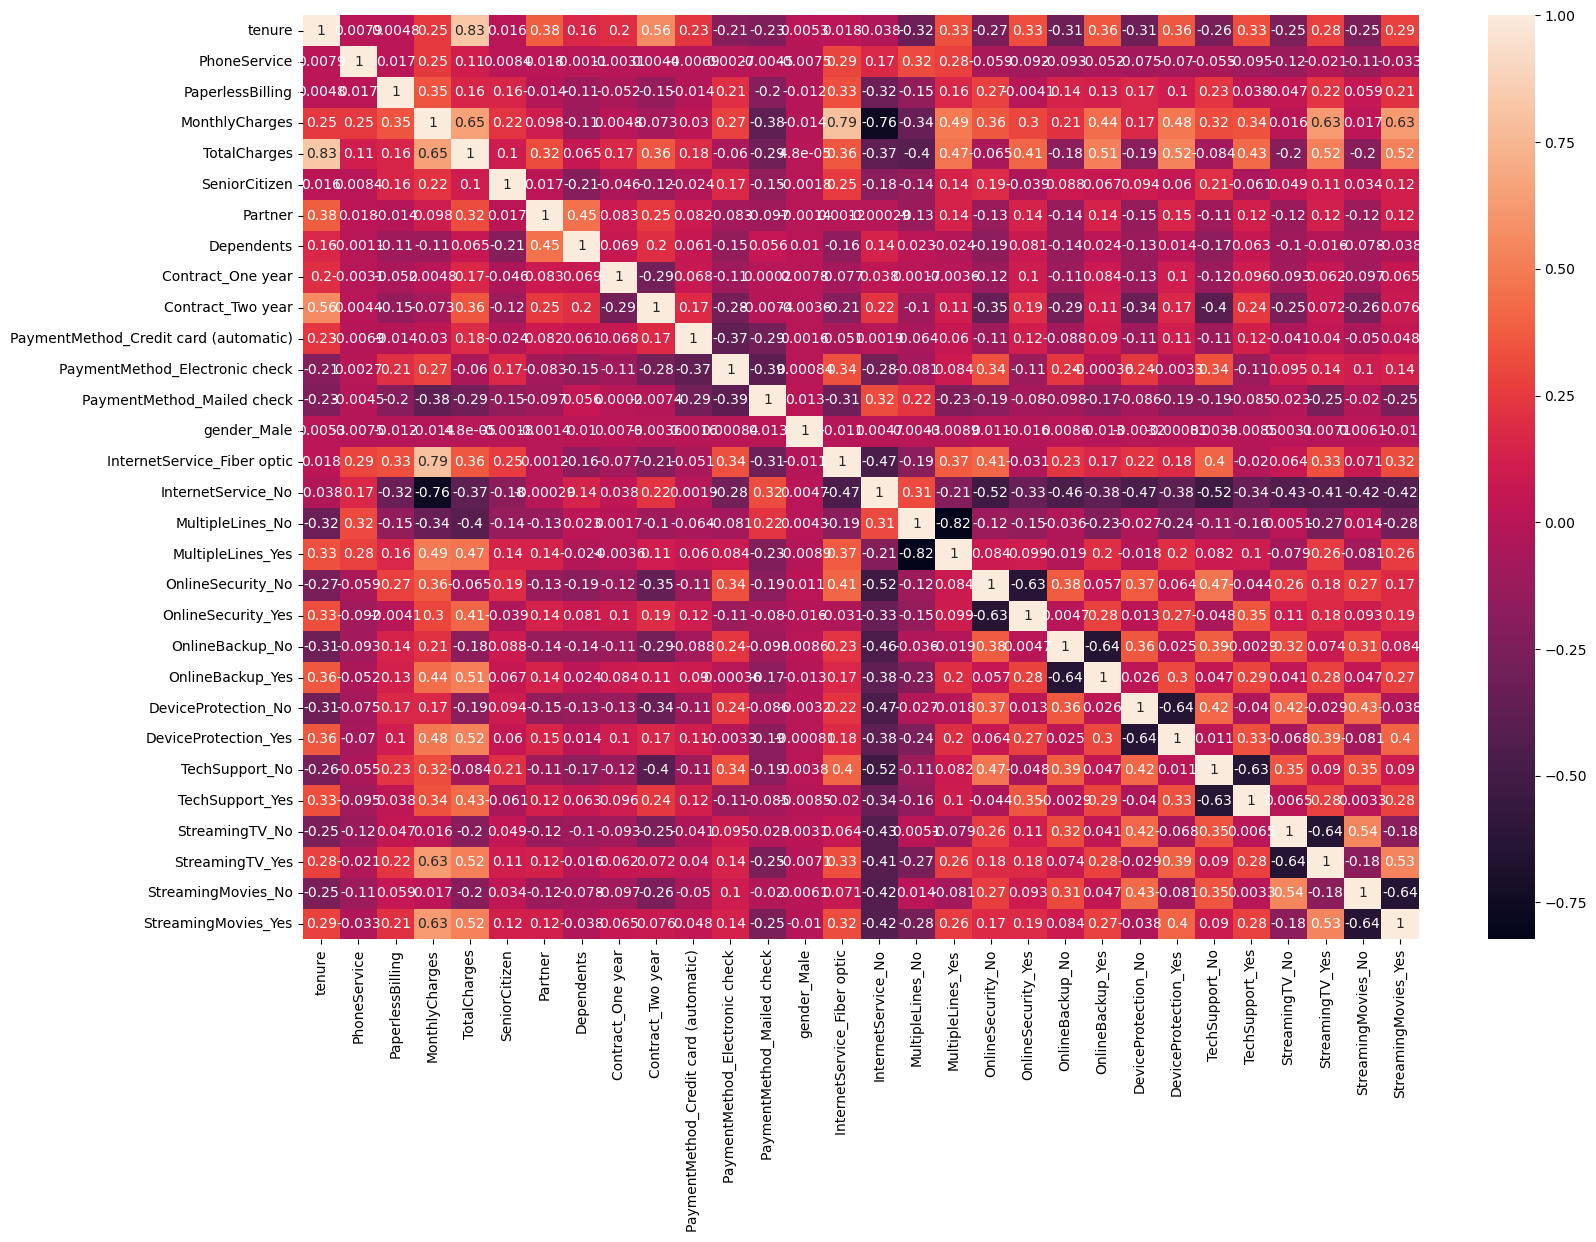

In [490]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Dropping highly correlated variables:

In [492]:
Xtrain.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [493]:
Xtrain = Xtrain.drop(['InternetService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'StreamingTV_No', 'StreamingMovies_No'], axis=1)
Xtest = Xtest.drop(['InternetService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'StreamingTV_No', 'StreamingMovies_No'], axis=1)

In [494]:
print(Xtrain.shape)
print(Xtest.shape)

(4922, 23)
(2110, 23)


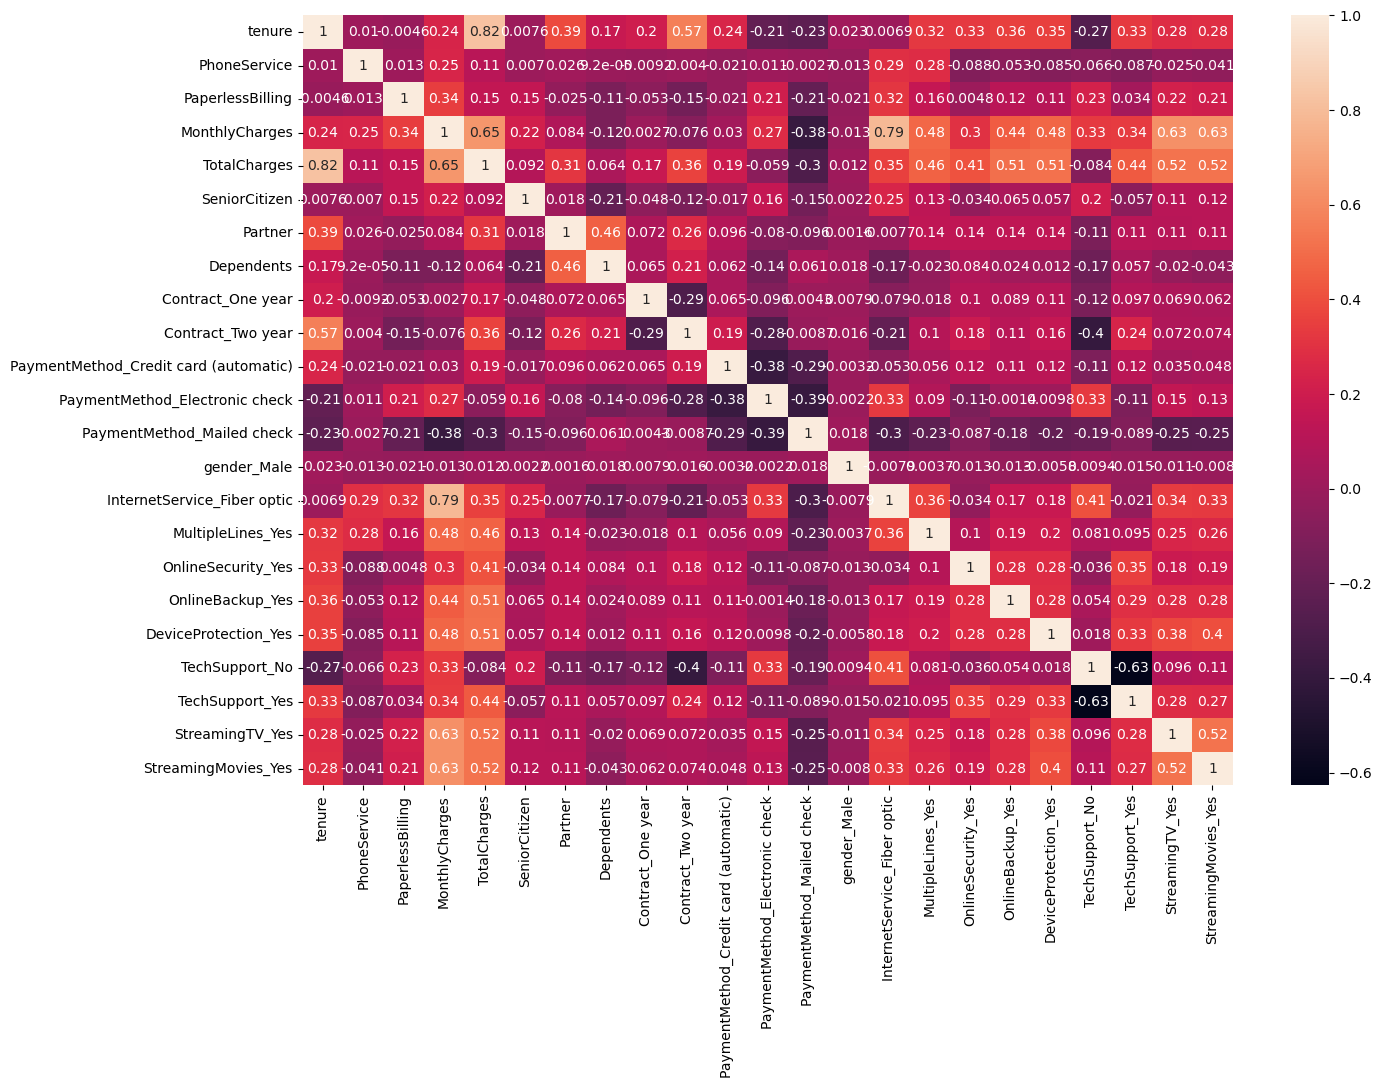

In [495]:
# Cheking the correlation matrix or the HeatMap again:

plt.figure(figsize=[15, 10])
sns.heatmap(Xtrain.corr(), annot=True)
plt.show()

We see there are still some correlations so let's change our approach.

### Step 6: Building Model using the StatsModels:

In [498]:
import statsmodels.api as sm                          # A Python library that provides classes and functions for statistical models - gives us a detailed statistical summary.
from sklearn.feature_selection import RFE             
from sklearn.linear_model import LogisticRegression

-> Generalized Linear Model (GLM) function from the statsmodels library. It is used to fit a wide variety of linear models by generalizing linear regression to models that can handle different types of distributions beyond normal distribution.

The family argument specifies the distribution of the dependent variable. Common families include:<br>
- sm.families.Binomial(): For binary or logistic regression.
- sm.families.Poisson(): For count data.
- sm.families.Gaussian(): For linear regression (normal distribution).
- sm.families.Multinomial(): For multiclass classification.

In [500]:
logml = sm.GLM(ytrain, (sm.add_constant(Xtrain)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.1
Date:                Sun, 29 Sep 2024   Deviance:                       4042.2
Time:                        18:24:48   Pearson chi2:                 5.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2859
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.3835      2.494     -2.159      0.031     -10.271      -0.496
tenure                                   -1.5221      0.187     -8.128      0.000      -1.889      -1.155
PhoneService                              0.5535      0.785      0.705      0.481      -0.984       2.091
PaperlessBilling                          0.2066      0.089      2.327      0.020       0.033       0.381
MonthlyCharges                           -1.6782      1.157     -1.450      0.147      -3.946       0.590
TotalCharges                              0.7688      0.194      3.956      0.000       0.388       1.150
SeniorCitizen                             0.2268      0.101      2.235      0.025       0.028       0.426
Partner                                   0.1332      0.094      1.420      0.155      -0.051       0.317
Dependents                               -0.2451      0.109     -2.240      0.025      -0.460      -0.031
Contract_One year                        -0.8185      0.133     -6.177      0.000      -1.078      -0.559
Contract_Two year                        -1.4284      0.209     -6.823      0.000      -1.839      -1.018
PaymentMethod_Credit card (automatic)    -0.1625      0.137     -1.186      0.236      -0.431       0.106
PaymentMethod_Electronic check            0.2029      0.113      1.790      0.073      -0.019       0.425
PaymentMethod_Mailed check               -0.1224      0.138     -0.886      0.376      -0.393       0.148
gender_Male                              -0.0202      0.078     -0.259      0.796      -0.173       0.133
InternetService_Fiber optic               2.1963      0.965      2.275      0.023       0.304       4.088
MultipleLines_Yes                         0.4650      0.214      2.173      0.030       0.046       0.884
OnlineSecurity_Yes                       -0.1314      0.215     -0.610      0.542      -0.553       0.291
OnlineBackup_Yes                          0.1700      0.212      0.803      0.422      -0.245       0.585
DeviceProtection_Yes                      0.2282      0.212      1.078      0.281      -0.187       0.643
TechSupport_No                            2.1515      0.976      2.204      0.028       0.238       4.065
TechSupport_Yes                           2.0515      1.168      1.757      0.079      -0.237       4.340
StreamingTV_Yes                           0.7632      0.393      1.942      0.052      -0.007       1.534
StreamingMovies_Yes                       0.7661      0.396      1.936      0.053      -0.010       1.542
=========================================================================================================
"""

__Observation:__<br>
The high p-values for some varibales indicates that the corresponding varibles are not statistically significant at tthe 5% level, meaning they might not be important predictors of the outcome.

In [502]:
# print(np.any(np.isnan(Xtrain)))
# print(np.any(np.isinf(Xtest)))

In [503]:
# Xtrain = Xtrain.dropna()  # Drop rows with NaN values
# ytrain = ytrain.loc[Xtrain.index]  # Ensure corresponding labels are aligned

In [504]:
# logml = sm.GLM(ytrain, (sm.add_constant(Xtrain)), family=sm.families.Binomial())
# logml.fit().summary()

### Step 7: Feature Selection using RFE:

In [506]:
log_reg_model = LogisticRegression()
rfe = RFE(estimator=log_reg_model, n_features_to_select=15)
rfe.fit(Xtrain, ytrain)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [507]:
# Features selected/rejected/ranked by the rfe:

list(zip(Xtrain.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 3),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 6),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [508]:
# Features selected by the rfe:
cols_selected_by_rfe = Xtrain.columns[rfe.support_]
cols_selected_by_rfe

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [509]:
# Features nit selected by the RFE:

Xtrain.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

#### Assessing the model with statsmodels:


__Note:-__<br>

- __scikit-learn:__ The .fit() method modifies the model object itself, so WE can directly call .predict() after fitting.
- __statsmodels:__ The .fit() method returns a separate result object that holds the fitted parameters, and we need to save this object using some variable and then use this result object for prediction.

In [512]:
Xtrain_sm = sm.add_constant(Xtrain[cols_selected_by_rfe]) #adding constant as the statsmodels does not do it by defaule (adding B0).
log_reg_model_2 = sm.GLM(ytrain, Xtrain_sm, family=sm.families.Binomial())
res = log_reg_model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.6
Date:                Sun, 29 Sep 2024   Deviance:                       4053.2
Time:                        18:24:49   Pearson chi2:                 5.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2843
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.9446      0.218     -8.900      0.000      -2.373      -1.516
tenure                            -1.4773      0.182     -8.106      0.000      -1.835      -1.120
PhoneService                      -0.5560      0.159     -3.500      0.000      -0.867      -0.245
PaperlessBilling                   0.2135      0.088      2.415      0.016       0.040       0.387
TotalCharges                       0.7119      0.188      3.791      0.000       0.344       1.080
SeniorCitizen                      0.2723      0.100      2.736      0.006       0.077       0.467
Contract_One year                 -0.8472      0.132     -6.441      0.000      -1.105      -0.589
Contract_Two year                 -1.4551      0.208     -6.994      0.000      -1.863      -1.047
PaymentMethod_Electronic check     0.3012      0.083      3.635      0.000       0.139       0.464
InternetService_Fiber optic        0.8326      0.117      7.086      0.000       0.602       1.063
MultipleLines_Yes                  0.1941      0.095      2.042      0.041       0.008       0.380
OnlineSecurity_Yes                -0.4055      0.102     -3.994      0.000      -0.604      -0.207
TechSupport_No                     0.7292      0.162      4.510      0.000       0.412       1.046
TechSupport_Yes                    0.3482      0.175      1.988      0.047       0.005       0.691
StreamingTV_Yes                    0.2107      0.097      2.183      0.029       0.022       0.400
StreamingMovies_Yes                0.2163      0.097      2.237      0.025       0.027       0.406
==================================================================================================
"""

In [513]:
ytrain_pred = res.predict(Xtrain_sm)
ytrain_pred       # these are basically the probability of getting 1

3946    0.328665
3394    0.086297
1635    0.364250
4088    0.629671
1886    0.004760
          ...   
3778    0.381412
5199    0.256501
5235    0.574957
5399    0.008125
862     0.584160
Length: 4922, dtype: float64

#### Creating a dataframe whith the actual churn flag and the predicted probabilities:

In [515]:
type(ytrain.values)

numpy.ndarray

In [516]:
ytrain_pred_final = pd.DataFrame({'Churn': ytrain.values, 'Churn_Proba': ytrain_pred})
ytrain_pred_final['CustID'] = ytrain.index     # The index attribute of a pandas Series returns the index labels associated with that Series. This index usually represents unique identifiers for each row in the Series.
ytrain_pred_final.head()

,Churn,Churn_Proba,CustID
3946,1,0.328665,3946
3394,0,0.086297,3394
1635,0,0.364250,1635
4088,1,0.629671,4088
1886,0,0.004760,1886


#### Creating new column 'predicted' starting with the approach: 1 if Churn Prob>0.5 else 0:

In [518]:
ytrain_pred_final['predicted'] = ytrain_pred_final.Churn_Proba.map(lambda x: 1 if x>0.5 else 0)

ytrain_pred_final.head()

,Churn,Churn_Proba,CustID,predicted
3946,1,0.328665,3946,0
3394,0,0.086297,3394,0
1635,0,0.364250,1635,0
4088,1,0.629671,4088,1
1886,0,0.004760,1886,0


In [519]:
confusion = metrics.confusion_matrix(ytrain_pred_final.Churn, ytrain_pred_final.predicted)
print(confusion)

[[3230  384]
 [ 580  728]]


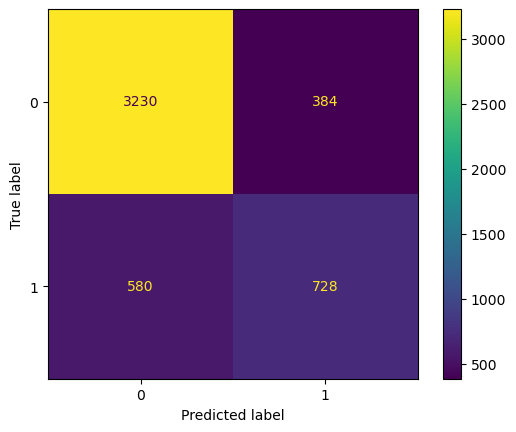

In [520]:
ConfusionMatrixDisplay(confusion_matrix=confusion).plot()

In [521]:
TN = confusion[0][0]
TP = confusion[1][1]
FN = confusion[1][0]
FP = confusion[0][1]

In [522]:
round(100*accuracy_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted), 3)

80.414

In [524]:
metrics.precision_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted)

0.6546762589928058

In [527]:
metrics.recall_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted)

0.5565749235474006

### Checking VIFs:

In [530]:
type(Xtrain[cols_selected_by_rfe].values)

numpy.ndarray

In [531]:
Xtrain[cols_selected_by_rfe].shape[1]

15

__variance_inflation_factor(Xtrain[cols_selected_by_rfe].values, i):__<br>

- This function computes the Variance Inflation Factor (VIF) for each feature.
- Xtrain[cols_selected_by_rfe].values: The .values attribute retrieves the underlying NumPy array from the DataFrame, which is passed to the function.
- i: This is the index of the feature for which we are calculating the VIF. The loop runs for each feature, from 0 to the number of features minus one.

In [533]:
vif = pd.DataFrame()
vif['Features'] = Xtrain[cols_selected_by_rfe].columns
vif['VIF'] = [variance_inflation_factor(Xtrain[cols_selected_by_rfe].values, i) for i in range(Xtrain[cols_selected_by_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,TotalCharges,7.08
1,PhoneService,6.42
0,tenure,6.38
11,TechSupport_No,4.80
8,InternetService_Fiber optic,4.15
12,TechSupport_Yes,3.30
6,Contract_Two year,3.05
2,PaperlessBilling,2.87
14,StreamingMovies_Yes,2.74
13,StreamingTV_Yes,2.73


We can see that there are a few variables with high VIF. It's best to drop these variables as they aren't helping much with predictions and nnecessarily making the model complex. The variblae, as of now, __TotalCharges, has the highest VIF of 7.08__. Let's drop this variable.

In [535]:
cols_selected_by_rfe = cols_selected_by_rfe.drop('TotalCharges', 1)

In [536]:
# Let's re-run the model using the selected variables:

Xtrain_sm = sm.add_constant(Xtrain[cols_selected_by_rfe])
log_reg_model_3 = sm.GLM(ytrain, Xtrain_sm, family=sm.families.Binomial())

res = log_reg_model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.2
Date:                Sun, 29 Sep 2024   Deviance:                       4068.4
Time:                        18:24:49   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2821
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1640      0.209    -10.365      0.000      -2.573      -1.755
tenure                            -0.8476      0.065    -12.943      0.000      -0.976      -0.719
PhoneService                      -0.4274      0.152     -2.807      0.005      -0.726      -0.129
PaperlessBilling                   0.2082      0.088      2.360      0.018       0.035       0.381
SeniorCitizen                      0.2721      0.100      2.720      0.007       0.076       0.468
Contract_One year                 -0.8349      0.130     -6.406      0.000      -1.090      -0.579
Contract_Two year                 -1.4189      0.205     -6.906      0.000      -1.822      -1.016
PaymentMethod_Electronic check     0.2927      0.083      3.524      0.000       0.130       0.455
InternetService_Fiber optic        0.9840      0.110      8.949      0.000       0.768       1.199
MultipleLines_Yes                  0.2477      0.094      2.641      0.008       0.064       0.432
OnlineSecurity_Yes                -0.3692      0.101     -3.645      0.000      -0.568      -0.171
TechSupport_No                     0.7649      0.161      4.755      0.000       0.450       1.080
TechSupport_Yes                    0.4371      0.172      2.535      0.011       0.099       0.775
StreamingTV_Yes                    0.2905      0.094      3.085      0.002       0.106       0.475
StreamingMovies_Yes                0.3046      0.094      3.244      0.001       0.121       0.489
==================================================================================================
"""

In [537]:
ytrain_pred = res.predict(Xtrain_sm)
ytrain_pred

3946    0.333167
3394    0.093809
1635    0.365409
4088    0.639638
1886    0.007227
          ...   
3778    0.362340
5199    0.214241
5235    0.585158
5399    0.017466
862     0.588817
Length: 4922, dtype: float64

In [538]:
ytrain_pred_final['Churn_Proba'] = ytrain_pred
ytrain_pred_final.head()

,Churn,Churn_Proba,CustID,predicted
3946,1,0.333167,3946,0
3394,0,0.093809,3394,0
1635,0,0.365409,1635,0
4088,1,0.639638,4088,1
1886,0,0.007227,1886,0


In [539]:
ytrain_pred_final['predicted'] = ytrain_pred_final.Churn_Proba.map(lambda x: 1 if x>0.5 else 0)

In [540]:
accuracy_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted)

0.8013002844372207

In [541]:
print(metrics.precision_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted))
print(metrics.recall_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted))

0.6491862567811935
0.5489296636085627


### Let's check the VIF again:

In [544]:
vif = pd.DataFrame()
vif['Features'] = Xtrain[cols_selected_by_rfe].columns
vif['VIF'] = [variance_inflation_factor(Xtrain[cols_selected_by_rfe].values, i) for i in range(Xtrain[cols_selected_by_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,PhoneService,5.90
10,TechSupport_No,4.75
7,InternetService_Fiber optic,3.28
11,TechSupport_Yes,3.26
2,PaperlessBilling,2.85
5,Contract_Two year,2.81
12,StreamingTV_Yes,2.58
13,StreamingMovies_Yes,2.58
8,MultipleLines_Yes,2.40
0,tenure,2.27


We can see that the variblae, as of now, __PhoneService, has the highest VIF of 5.90__. Let's drop this variable.

In [546]:
cols_selected_by_rfe = cols_selected_by_rfe.drop('PhoneService', 1)

In [547]:
Xtrain_sm.head()

,const,tenure,PhoneService,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
3946,1.0,-0.952316,0,0,0,0,0,0,0,0,1,0,1,1,1
3394,1.0,-0.262207,1,0,0,1,0,1,0,1,1,1,0,0,0
1635,1.0,-1.195884,1,1,0,1,0,1,0,0,0,1,0,1,1
4088,1.0,-1.033505,1,0,0,0,0,1,1,1,0,1,0,0,0
1886,1.0,1.402172,1,1,0,0,1,0,0,0,1,0,1,0,0


In [548]:
# Let's re-run the model using the selected variables:

Xtrain_sm = sm.add_constant(Xtrain[cols_selected_by_rfe])
log_reg_model_4 = sm.GLM(ytrain, Xtrain_sm, family=sm.families.Binomial())

res = log_reg_model_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.1
Date:                Sun, 29 Sep 2024   Deviance:                       4076.2
Time:                        18:24:49   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2809
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.5751      0.149    -17.253      0.000      -2.868      -2.283
tenure                            -0.8331      0.065    -12.748      0.000      -0.961      -0.705
PaperlessBilling                   0.2160      0.088      2.454      0.014       0.043       0.389
SeniorCitizen                      0.2877      0.100      2.882      0.004       0.092       0.483
Contract_One year                 -0.8431      0.130     -6.463      0.000      -1.099      -0.587
Contract_Two year                 -1.4203      0.206     -6.903      0.000      -1.824      -1.017
PaymentMethod_Electronic check     0.2992      0.083      3.610      0.000       0.137       0.462
InternetService_Fiber optic        0.8475      0.097      8.710      0.000       0.657       1.038
MultipleLines_Yes                  0.1961      0.092      2.142      0.032       0.017       0.376
OnlineSecurity_Yes                -0.3877      0.101     -3.841      0.000      -0.586      -0.190
TechSupport_No                     0.9003      0.153      5.901      0.000       0.601       1.199
TechSupport_Yes                    0.5524      0.167      3.316      0.001       0.226       0.879
StreamingTV_Yes                    0.2988      0.094      3.177      0.001       0.114       0.483
StreamingMovies_Yes                0.3214      0.094      3.434      0.001       0.138       0.505
==================================================================================================
"""

In [549]:
ytrain_pred = res.predict(Xtrain_sm)
ytrain_pred

3946    0.269565
3394    0.100478
1635    0.404635
4088    0.629258
1886    0.008303
          ...   
3778    0.381688
5199    0.211854
5235    0.571921
5399    0.017785
862     0.597977
Length: 4922, dtype: float64

In [550]:
ytrain_pred_final['Churn_Proba'] = ytrain_pred
ytrain_pred_final.head()

,Churn,Churn_Proba,CustID,predicted
3946,1,0.269565,3946,0
3394,0,0.100478,3394,0
1635,0,0.404635,1635,0
4088,1,0.629258,4088,1
1886,0,0.008303,1886,0


In [551]:
ytrain_pred_final['predicted'] = ytrain_pred_final.Churn_Proba.map(lambda x: 1 if x>0.5 else 0)

In [554]:
accuracy_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted)

0.8017066233238521

In [555]:
print(metrics.precision_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted))
print(metrics.recall_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted))

0.6539888682745826
0.5389908256880734


### Let's check the VIF again:

In [559]:
vif = pd.DataFrame()
vif['Features'] = Xtrain[cols_selected_by_rfe].columns
vif['VIF'] = [variance_inflation_factor(Xtrain[cols_selected_by_rfe].values, i) for i in range(Xtrain[cols_selected_by_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,TechSupport_No,4.50
10,TechSupport_Yes,3.15
6,InternetService_Fiber optic,3.07
1,PaperlessBilling,2.75
12,StreamingMovies_Yes,2.57
11,StreamingTV_Yes,2.56
7,MultipleLines_Yes,2.18
8,OnlineSecurity_Yes,1.97
5,PaymentMethod_Electronic check,1.91
4,Contract_Two year,1.89


In [562]:
confusion = metrics.confusion_matrix(ytrain_pred_final.Churn, ytrain_pred_final.predicted)
print(confusion)

[[3241  373]
 [ 603  705]]


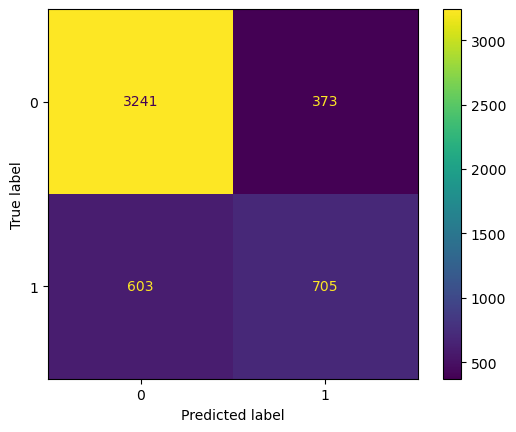

In [563]:
ConfusionMatrixDisplay(confusion_matrix=confusion).plot()

In [564]:
TN = confusion[0][0]
TP = confusion[1][1]
FN = confusion[1][0]
FP = confusion[0][1]

In [565]:
# sensitivity/tpr/Recall:

round(TP/(TP+FN), 3)

0.539

In [566]:
# specificity/tnr:

round(TN/(TN+FP), 3)

0.897

In [571]:
# fpr:
round(1 - (round(TN/(TN+FP), 3)), 3)

0.103

In [572]:
# precision/ppv:

round(TP/(TP+FP), 3)

0.654

In [575]:
# npv:

round(TN/(TN+FN), 3)

0.843

##### The sensitivity that we got (~53.9%) was quite low and clearly needs to be dealt with.
- We assigned 0s and 1s to the customers after building the model, we arbitrarily chose a cut-off of 0.5 wherein if the probability of churning for a customer is greater than 0.5, we classified it as a 'Churn' and if the probability of churning for a customer is less than 0.5, we classified it as a 'Non-churn'.
- Now, this cut-off was chosen at random and there was no particular logic behind it. So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity.

In [579]:
# 'ROC Curve (AUC = {area=%0.2f})' % auc_score

In [582]:
def draw_roc(ytrue, yprobs):
    fpr, tpr, thresholds = metrics.roc_curve(ytrue, yprobs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(ytrue, yprobs)

    plt.figure(figsize=[5,5])
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC (area) = {round(auc_score, 3)})')
    plt.plot([0,1], [0,1], '--') # first list for x(start the line from 0 and end at 1), next list is for y(start at 0 and end at 1) creates a 45° diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title("ROC Curve")
    plt.legend(loc='lower right')
    plt.show()

    return None

In [583]:
fpr, tpr, threshold = metrics.roc_curve(ytrain_pred_final.Churn, ytrain_pred_final.Churn_Proba)

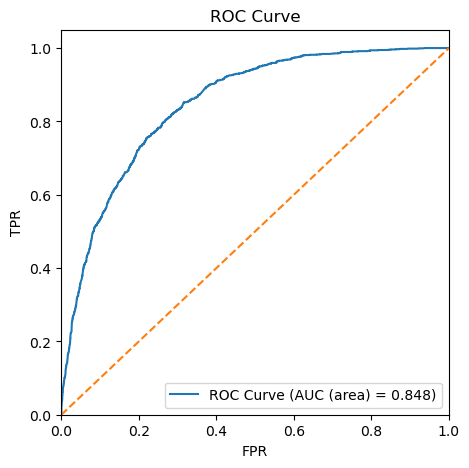

In [587]:
draw_roc(ytrain_pred_final.Churn, ytrain_pred_final.Churn_Proba)

#### Finding the optimal cutoff point:

Optimal cutoff probability if that prob where we get balanced sensitivity and specificity.

In [591]:
[(x)/10 for x in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [593]:
# Let's create columns with different probability cutoffs:

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    ytrain_pred_final[i] = ytrain_pred_final.Churn_Proba.map(lambda x: 1 if x>i else 0)
ytrain_pred_final.head()

,Churn,Churn_Proba,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3946,1,0.269565,3946,0,1,1,1,0,0,0,0,0,0,0
3394,0,0.100478,3394,0,1,1,0,0,0,0,0,0,0,0
1635,0,0.404635,1635,0,1,1,1,1,1,0,0,0,0,0
4088,1,0.629258,4088,1,1,1,1,1,1,1,1,0,0,0
1886,0,0.008303,1886,0,1,0,0,0,0,0,0,0,0,0


In [595]:
type(numbers)

list

In [596]:
cutoff_df.head()

,proba,accuracy,sensi,speci
0,0.0,0.265746,1.000000,0.000000
1,0.1,0.618245,0.943425,0.500553
2,0.2,0.714750,0.861621,0.661594
3,0.3,0.766558,0.766055,0.766740
4,0.4,0.788907,0.661315,0.835086


In [597]:
# Now let's calculate accuracy, sensitivity, and specificity for various probability cutoffs.

# cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
results=[]
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    confusion_matrix1 = metrics.confusion_matrix(ytrain_pred_final.Churn, ytrain_pred_final[i])
    TN, TP, FN, FP = confusion_matrix1[0][0], confusion_matrix1[1][1], confusion_matrix1[1][0], confusion_matrix1[0][1]
    total = TN+TP+FN+FP

    accuracy = (TN+TP)/total
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    results.append({'proba':i, 'accuracy':accuracy, 'sensi':sensi, 'speci':speci})
    
cutoff_df = pd.DataFrame(results)
print(cutoff_df)

   proba  accuracy     sensi     speci
0    0.0  0.265746  1.000000  0.000000
1    0.1  0.618245  0.943425  0.500553
2    0.2  0.714750  0.861621  0.661594
3    0.3  0.766558  0.766055  0.766740
4    0.4  0.788907  0.661315  0.835086
5    0.5  0.801707  0.538991  0.896790
6    0.6  0.799472  0.406728  0.941616
7    0.7  0.770622  0.198777  0.977587
8    0.8  0.742787  0.035933  0.998616
9    0.9  0.734254  0.000000  1.000000


In [599]:
type(results)

list

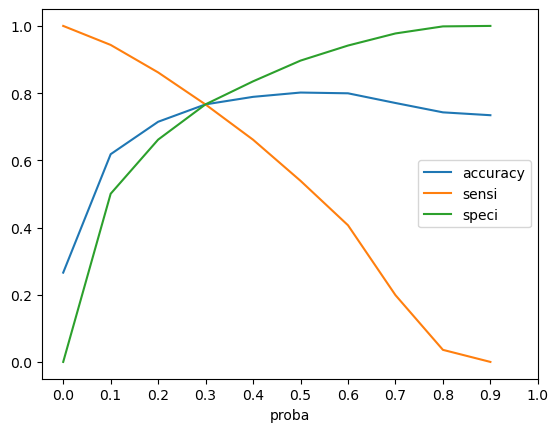

In [602]:
# Let's plot the accuracy, sensitivity, and specificity for various probabilities:

cutoff_df.plot.line(x='proba', y=['accuracy', 'sensi', 'speci'])
plt.xticks(np.linspace(0, 1, 11))
plt.show()

#### From the above plot we can decern that the threshold of '0.3' is the optimum point to take the cutoff probability.

This also is business/domain dependent.

In [609]:
ytrain_pred_final.head()

,Churn,Churn_Proba,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3946,1,0.269565,3946,0,1,1,1,0,0,0,0,0,0,0
3394,0,0.100478,3394,0,1,1,0,0,0,0,0,0,0,0
1635,0,0.404635,1635,0,1,1,1,1,1,0,0,0,0,0
4088,1,0.629258,4088,1,1,1,1,1,1,1,1,0,0,0
1886,0,0.008303,1886,0,1,0,0,0,0,0,0,0,0,0


In [610]:
ytrain_pred_final['predicted'] = ytrain_pred_final.Churn_Proba.map(lambda x: 1 if x>0.3 else 0)
ytrain_pred_final.head()

,Churn,Churn_Proba,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3946,1,0.269565,3946,0,1,1,1,0,0,0,0,0,0,0
3394,0,0.100478,3394,0,1,1,0,0,0,0,0,0,0,0
1635,0,0.404635,1635,1,1,1,1,1,1,0,0,0,0,0
4088,1,0.629258,4088,1,1,1,1,1,1,1,1,0,0,0
1886,0,0.008303,1886,0,1,0,0,0,0,0,0,0,0,0


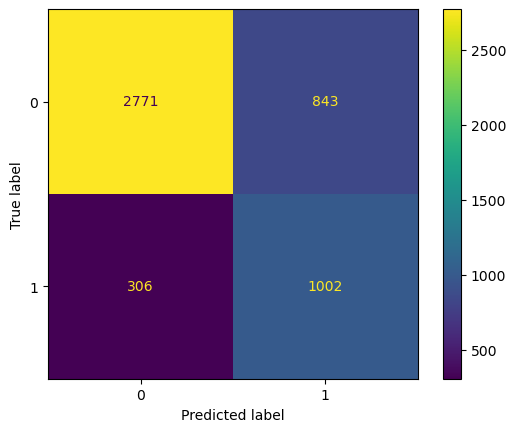

In [611]:
confusion = metrics.confusion_matrix(ytrain_pred_final.Churn, ytrain_pred_final.predicted)
ConfusionMatrixDisplay(confusion_matrix=confusion).plot()

In [614]:
confusion

array([[2771,  843],
       [ 306, 1002]], dtype=int64)

In [708]:
TN, TP, FN, FP = confusion[0,0], confusion[1,1], confusion[1,0], confusion[0,1]

accuracy_train = (TN+TP)/(TN+TP+FN+FP)
sensitivity_train = TP/(TP+FN)
specificity_train = TN/(TN+FP)

print(round(accuracy_train, 3))
print(round(sensitivity_train,3))
print(round(specificity_train,3))

0.767
0.766
0.767


In [619]:
from sklearn.metrics import precision_score, recall_score

In [622]:
precision_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted)

0.5430894308943089

In [625]:
recall_score(ytrain_pred_final.Churn, ytrain_pred_final.predicted)

0.7660550458715596

## Making predictions on the test set:

In [655]:
Xtest_sm = sm.add_constant(Xtest)

In [657]:
Xtest_sm

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,...,gender_Male,InternetService_Fiber optic,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
2481,1.0,1.158605,1,0,-1.314936,-0.342019,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
6784,1.0,-0.546370,1,0,-1.324897,-0.800034,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6125,1.0,-0.789938,1,1,1.250078,-0.405135,0,1,0,0,...,1,1,1,0,0,1,1,0,1,1
3052,1.0,0.184334,1,1,-0.317154,-0.108126,0,1,0,0,...,1,0,1,1,0,0,1,0,0,0
4099,1.0,-1.074100,0,0,-1.167178,-0.934621,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1.0,1.280389,1,0,0.546152,1.264546,0,1,1,0,...,1,1,0,1,1,0,1,0,0,0
6747,1.0,0.793253,0,0,-0.967953,-0.139872,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
1700,1.0,0.590280,1,0,-1.466014,-0.589066,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1099,1.0,-1.114695,1,1,-0.295571,-0.891314,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0


In [659]:
Xtrain_sm.shape

(4922, 14)

In [661]:
Xtest_sm.shape

(2110, 24)

In [663]:
Xtrain_sm.head(2)

,const,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
3946,1.0,-0.952316,0,0,0,0,0,0,0,1,0,1,1,1
3394,1.0,-0.262207,0,0,1,0,1,0,1,1,1,0,0,0


In [664]:
Xtest_sm.head(2)

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,...,gender_Male,InternetService_Fiber optic,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
2481,1.0,1.158605,1,0,-1.314936,-0.342019,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
6784,1.0,-0.546370,1,0,-1.324897,-0.800034,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [666]:
print(Xtrain_sm.columns)
print('-----------------------')
print(Xtest_sm.columns)

Index(['const', 'tenure', 'PaperlessBilling', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')
-----------------------
Index(['const', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')


We have dropped some variables from train set suing VIF, RFE, etc approaches. Same variables we need to drop from the test set as well.

In [670]:
Xtest_sm[Xtrain_sm.columns].columns == Xtrain_sm.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [671]:
Xtest_sm = Xtest_sm[Xtrain_sm.columns]

In [672]:
ytest_pred = res.predict(Xtest_sm)
ytest_pred.values

array([0.01124148, 0.12743455, 0.70333203, ..., 0.01112692, 0.33583536,
       0.15686448])

In [673]:
ytrain_pred_final = ytrain_pred_final.iloc[:, 0:4]
ytrain_pred_final.head()

,Churn,Churn_Proba,CustID,predicted
3946,1,0.269565,3946,0
3394,0,0.100478,3394,0
1635,0,0.404635,1635,1
4088,1,0.629258,4088,1
1886,0,0.008303,1886,0


In [677]:
ytrain_pred_final.rename(columns={'Churn_Proba':'Churn_Proba_train',
                                  'predicted':'train_predictions'}, inplace=True)
ytrain_pred_final = ytrain_pred_final.iloc[:, 0:4]
ytrain_pred_final.head()

,Churn,Churn_Proba_train,CustID,train_predictions
3946,1,0.269565,3946,0
3394,0,0.100478,3394,0
1635,0,0.404635,1635,1
4088,1,0.629258,4088,1
1886,0,0.008303,1886,0


In [679]:
ytest.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [682]:
ytest_pred_final = pd.DataFrame({'Churn_test_actual':ytest.values, 
                                 'Churn_Proba_test':ytest_pred})

In [684]:
ytest_pred_final['CustID'] = ytest.index
ytest_pred_final.head()

,Churn_test_actual,Churn_Proba_test,CustID
2481,0,0.011241,2481
6784,0,0.127435,6784
6125,1,0.703332,6125
3052,0,0.141372,3052
4099,0,0.237273,4099


In [686]:
ytest_pred_final['test_predictions'] = ytest_pred_final.Churn_Proba_test.map(lambda x: 1 if x>0.3 else 0)
ytest_pred_final.head()

,Churn_test_actual,Churn_Proba_test,CustID,test_predictions
2481,0,0.011241,2481,0
6784,0,0.127435,6784,0
6125,1,0.703332,6125,1
3052,0,0.141372,3052,0
4099,0,0.237273,4099,0


In [688]:
confusion_test = metrics.confusion_matrix(ytest_pred_final.Churn_test_actual, ytest_pred_final.test_predictions)
confusion_test

array([[1170,  379],
       [ 131,  430]], dtype=int64)

In [690]:
TN, TP, FN, FP = confusion_test[0,0], confusion_test[1,1], confusion_test[1,0], confusion_test[0,1]

In [692]:
#accuracy

accuracy_test = (TN+TP)/(TN+TP+FN+FP)

In [694]:
# Sensitivity/tpr/recall

sensitivity_test = TP/(TP+FN)

In [696]:
# Specificity/tnr

specificity_test = TN/(TN+FP)

In [698]:
# fpr

(1- TN/(TN+FP))

0.24467398321497735

In [700]:
# ppv

TP/(TP+FP)

0.5315203955500618

In [702]:
# nppv

TN/(TN+FN)

0.8993082244427364

In [710]:
print(f'Train accuracy: {accuracy_train}')
print(f'Test accuracy: {accuracy_test}\n')

print(f'Train sensitivity: {sensitivity_train}')
print(f'Test sensitivity: {sensitivity_test}\n')

print(f'Train specificity: {specificity_train}')
print(f'Test specificity: {specificity_test}')

Train accuracy: 0.7665583096302316
Test accuracy: 0.7582938388625592

Train sensitivity: 0.7660550458715596
Test sensitivity: 0.7664884135472371

Train specificity: 0.7667404537908135
Test specificity: 0.7553260167850226
